In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [123]:
df = pd.read_csv("D:/AI Singapore/database.csv")
df

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,review_score,basement_size,built,renovation,zipcode,latitude,longitude,living_room_size,lot_size
0,7787980.0,13 October 2014,221900.0,3.0,1.00,1.0,0.0,0.0,fair,10.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6774848.0,09 December 2014,538000.0,3.0,2.25,2.0,0.0,0.0,fair,7.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,6999329.0,25 February 2015,180000.0,2.0,1.00,1.0,0.0,0.0,fair,8.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,7773052.0,09 December 2014,604000.0,4.0,3.00,1.0,0.0,0.0,excellent,6.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,7760818.0,18 February 2015,510000.0,3.0,2.00,1.0,0.0,0.0,fair,6.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23149,7681392.0,30 September 2014,455000.0,2.0,1.75,1.0,0.0,0.0,fair,6.0,0.0,2004.0,0.0,98053.0,47.7171,-122.033,1440.0,4839.0
23150,6990763.0,24 October 2014,239000.0,3.0,1.50,1.0,0.0,0.0,fair,NaN,430.0,1971.0,0.0,98188.0,47.4239,-122.292,1400.0,11500.0
23151,7261690.0,13 April 2015,179000.0,2.0,1.00,1.0,0.0,0.0,FAIR,11.0,0.0,1949.0,0.0,98188.0,47.4488,-122.274,1100.0,8916.0
23152,6844960.0,04 May 2015,450000.0,3.0,1.00,1.5,0.0,0.0,good,7.0,0.0,1917.0,0.0,98118.0,47.5620,-122.289,1140.0,3960.0


In [124]:
df.replace("?", np.nan, inplace=True)
df.dropna(axis=0, inplace=True)

In [125]:
df

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,review_score,basement_size,built,renovation,zipcode,latitude,longitude,living_room_size,lot_size
0,7787980.0,13 October 2014,221900.0,3.0,1.00,1.0,0.0,0.0,fair,10.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6774848.0,09 December 2014,538000.0,3.0,2.25,2.0,0.0,0.0,fair,7.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,6999329.0,25 February 2015,180000.0,2.0,1.00,1.0,0.0,0.0,fair,8.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,7773052.0,09 December 2014,604000.0,4.0,3.00,1.0,0.0,0.0,excellent,6.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,7760818.0,18 February 2015,510000.0,3.0,2.00,1.0,0.0,0.0,fair,6.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23146,8031079.0,29 July 2014,750000.0,3.0,2.50,2.0,1.0,3.0,good,9.0,0.0,1990.0,0.0,98070.0,47.4000,-122.420,2350.0,41433.0
23147,6749004.0,10 April 2015,237000.0,3.0,1.50,1.0,0.0,0.0,fair,7.0,0.0,1962.0,0.0,98198.0,47.3798,-122.306,1640.0,8060.0
23149,7681392.0,30 September 2014,455000.0,2.0,1.75,1.0,0.0,0.0,fair,6.0,0.0,2004.0,0.0,98053.0,47.7171,-122.033,1440.0,4839.0
23151,7261690.0,13 April 2015,179000.0,2.0,1.00,1.0,0.0,0.0,FAIR,11.0,0.0,1949.0,0.0,98188.0,47.4488,-122.274,1100.0,8916.0


In [126]:
df['condition'].value_counts()

fair         11789
good          4743
excellent     1396
FAIR           997
GOOD           438
poor           140
EXCELLENT      140
terrible        29
POOR            14
TERRIBLE         2
Name: condition, dtype: int64

In [127]:
df['condition'].replace(['FAIR','GOOD','EXCELLENT','POOR','TERRIBLE'],['fair','good','excellent','poor','terrible'], inplace=True)

In [128]:
df['condition'].value_counts()

fair         12786
good          5181
excellent     1536
poor           154
terrible        31
Name: condition, dtype: int64

In [129]:
onehot = pd.get_dummies(df['condition'])
df = df.join(onehot, how='outer')

In [130]:
df

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,review_score,...,zipcode,latitude,longitude,living_room_size,lot_size,excellent,fair,good,poor,terrible
0,7787980.0,13 October 2014,221900.0,3.0,1.00,1.0,0.0,0.0,fair,10.0,...,98178.0,47.5112,-122.257,1340.0,5650.0,0,1,0,0,0
1,6774848.0,09 December 2014,538000.0,3.0,2.25,2.0,0.0,0.0,fair,7.0,...,98125.0,47.7210,-122.319,1690.0,7639.0,0,1,0,0,0
2,6999329.0,25 February 2015,180000.0,2.0,1.00,1.0,0.0,0.0,fair,8.0,...,98028.0,47.7379,-122.233,2720.0,8062.0,0,1,0,0,0
3,7773052.0,09 December 2014,604000.0,4.0,3.00,1.0,0.0,0.0,excellent,6.0,...,98136.0,47.5208,-122.393,1360.0,5000.0,1,0,0,0,0
4,7760818.0,18 February 2015,510000.0,3.0,2.00,1.0,0.0,0.0,fair,6.0,...,98074.0,47.6168,-122.045,1800.0,7503.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23146,8031079.0,29 July 2014,750000.0,3.0,2.50,2.0,1.0,3.0,good,9.0,...,98070.0,47.4000,-122.420,2350.0,41433.0,0,0,1,0,0
23147,6749004.0,10 April 2015,237000.0,3.0,1.50,1.0,0.0,0.0,fair,7.0,...,98198.0,47.3798,-122.306,1640.0,8060.0,0,1,0,0,0
23149,7681392.0,30 September 2014,455000.0,2.0,1.75,1.0,0.0,0.0,fair,6.0,...,98053.0,47.7171,-122.033,1440.0,4839.0,0,1,0,0,0
23151,7261690.0,13 April 2015,179000.0,2.0,1.00,1.0,0.0,0.0,fair,11.0,...,98188.0,47.4488,-122.274,1100.0,8916.0,0,1,0,0,0


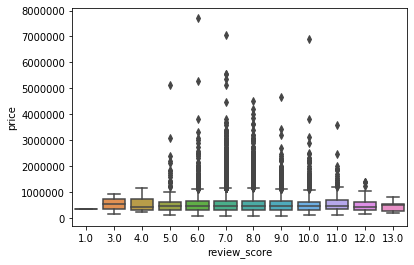

In [131]:
sns.boxplot(x="review_score", y='price', data=df)

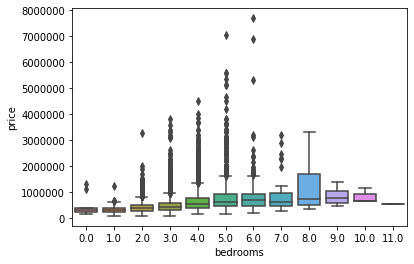

In [132]:
sns.boxplot(x="bedrooms", y='price', data=df)

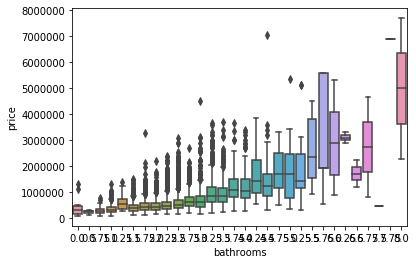

In [133]:
sns.boxplot(x='bathrooms', y='price', data=df)

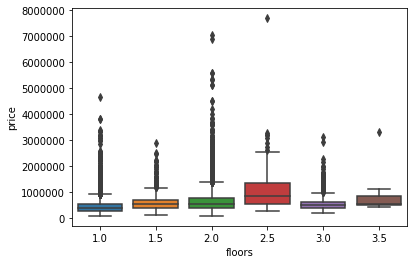

In [134]:
sns.boxplot(x='floors', y='price', data=df)

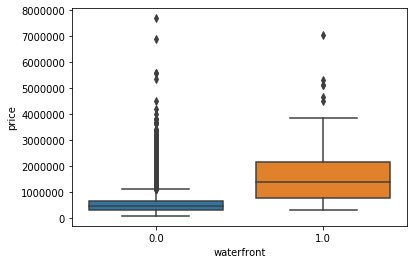

In [135]:
sns.boxplot(x='waterfront', y='price', data=df)

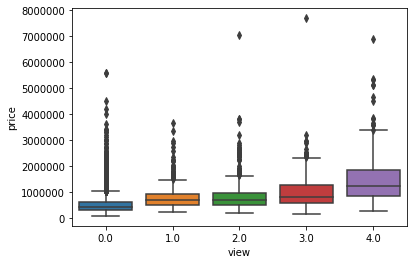

In [136]:
sns.boxplot(x='view', y='price', data=df)

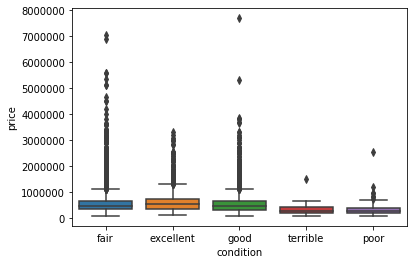

In [137]:
sns.boxplot(x='condition', y='price', data=df)

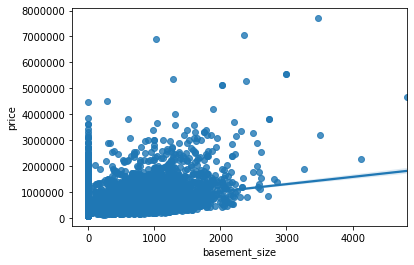

In [138]:
sns.regplot(x='basement_size', y='price', data=df)

In [139]:
pearson_coef, p_value = stats.pearsonr(df['basement_size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.3345422253112958  with a P-value of P = 0.0


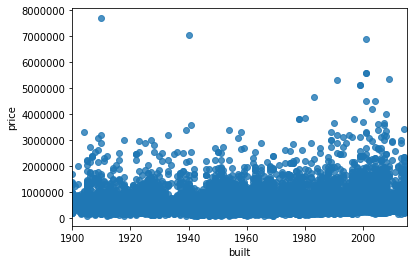

In [140]:
sns.regplot(x='built', y='price', data=df)

In [141]:
pearson_coef, p_value = stats.pearsonr(df['built'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.055135703375819904  with a P-value of P = 9.80923182292733e-15


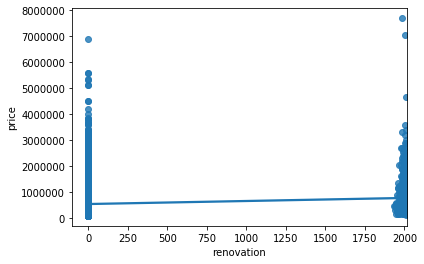

In [142]:
sns.regplot(x='renovation', y='price', data=df)

In [143]:
pearson_coef, p_value = stats.pearsonr(df['renovation'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.12746549241002686  with a P-value of P = 4.2049358949580815e-72


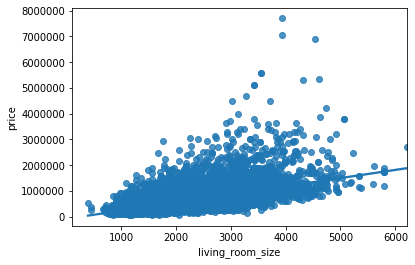

In [144]:
sns.regplot(x='living_room_size',y='price', data=df)

In [145]:
pearson_coef, p_value = stats.pearsonr(df['living_room_size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5827065585263401  with a P-value of P = 0.0


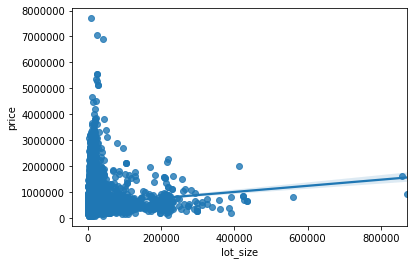

In [146]:
sns.regplot(x='lot_size', y='price', data=df)

In [147]:
pearson_coef, p_value = stats.pearsonr(df['lot_size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.08752364357870825  with a P-value of P = 8.660120107551924e-35


In [148]:
df.corr()['price']

id                  0.014904
price               1.000000
bedrooms            0.315279
bathrooms           0.528041
floors              0.256469
waterfront          0.275233
view                0.401768
review_score       -0.004101
basement_size       0.334542
built               0.055136
renovation          0.127465
zipcode            -0.057145
latitude            0.303502
longitude           0.022582
living_room_size    0.582707
lot_size            0.087524
excellent           0.057954
fair                0.005209
good               -0.028546
poor               -0.051972
terrible           -0.022188
Name: price, dtype: float64

In [149]:
df.drop_duplicates(subset=['id'], keep='first', inplace=True)

In [150]:
df

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,review_score,...,zipcode,latitude,longitude,living_room_size,lot_size,excellent,fair,good,poor,terrible
0,7787980.0,13 October 2014,221900.0,3.0,1.00,1.0,0.0,0.0,fair,10.0,...,98178.0,47.5112,-122.257,1340.0,5650.0,0,1,0,0,0
1,6774848.0,09 December 2014,538000.0,3.0,2.25,2.0,0.0,0.0,fair,7.0,...,98125.0,47.7210,-122.319,1690.0,7639.0,0,1,0,0,0
2,6999329.0,25 February 2015,180000.0,2.0,1.00,1.0,0.0,0.0,fair,8.0,...,98028.0,47.7379,-122.233,2720.0,8062.0,0,1,0,0,0
3,7773052.0,09 December 2014,604000.0,4.0,3.00,1.0,0.0,0.0,excellent,6.0,...,98136.0,47.5208,-122.393,1360.0,5000.0,1,0,0,0,0
4,7760818.0,18 February 2015,510000.0,3.0,2.00,1.0,0.0,0.0,fair,6.0,...,98074.0,47.6168,-122.045,1800.0,7503.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23119,6931291.0,24 February 2015,718000.0,4.0,2.75,1.0,0.0,0.0,excellent,7.0,...,98144.0,47.5841,-122.295,2200.0,4000.0,1,0,0,0,0
23124,8068047.0,15 September 2014,1205000.0,4.0,3.50,2.0,0.0,2.0,fair,7.0,...,98115.0,47.6762,-122.267,2100.0,6250.0,0,1,0,0,0
23128,7493632.0,22 December 2014,323000.0,4.0,1.75,1.0,0.0,0.0,good,11.0,...,98155.0,47.7639,-122.332,1940.0,7208.0,0,0,1,0,0
23130,7892349.0,11 September 2014,3640900.0,4.0,3.25,2.0,1.0,4.0,good,8.0,...,98039.0,47.6409,-122.241,3820.0,25582.0,0,0,1,0,0


In [151]:
df.drop(['id','date','review_score','zipcode','latitude','longitude','condition'],axis=1,inplace=True)

In [152]:
df

,price,bedrooms,bathrooms,floors,waterfront,view,basement_size,built,renovation,living_room_size,lot_size,excellent,fair,good,poor,terrible
0,221900.0,3.0,1.00,1.0,0.0,0.0,0.0,1955.0,0.0,1340.0,5650.0,0,1,0,0,0
1,538000.0,3.0,2.25,2.0,0.0,0.0,400.0,1951.0,1991.0,1690.0,7639.0,0,1,0,0,0
2,180000.0,2.0,1.00,1.0,0.0,0.0,0.0,1933.0,0.0,2720.0,8062.0,0,1,0,0,0
3,604000.0,4.0,3.00,1.0,0.0,0.0,910.0,1965.0,0.0,1360.0,5000.0,1,0,0,0,0
4,510000.0,3.0,2.00,1.0,0.0,0.0,0.0,1987.0,0.0,1800.0,7503.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23119,718000.0,4.0,2.75,1.0,0.0,0.0,1270.0,1939.0,0.0,2200.0,4000.0,1,0,0,0,0
23124,1205000.0,4.0,3.50,2.0,0.0,2.0,450.0,2006.0,0.0,2100.0,6250.0,0,1,0,0,0
23128,323000.0,4.0,1.75,1.0,0.0,0.0,0.0,1963.0,0.0,1940.0,7208.0,0,0,1,0,0
23130,3640900.0,4.0,3.25,2.0,1.0,4.0,0.0,1990.0,0.0,3820.0,25582.0,0,0,1,0,0


In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [154]:
ydata = df['price']
xdata = df.drop('price',axis=1)

In [155]:
x_train, x_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.1, random_state = 1)
print("number of test samples :", x_test.shape[0])
print("number of training samples :", x_train.shape[0])

number of test samples : 1844
number of training samples : 16587


In [156]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [159]:
yhat = poly.predict(x_test_pr)
yhat

array([ 265547.74560481, 1894781.9083306 ,  603866.01926243, ...,
        555056.60850073,  628334.7713189 ,  396810.29367973])

In [160]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 265547.74560481 1894781.9083306   603866.01926243  853010.21808515]
True values: [279950. 770000. 499990. 985000.]


In [171]:
poly.score(x_train_pr, y_train)

0.635344564618803

In [172]:
poly.score(x_test_pr, y_test)

0.6556496793594829

In [162]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price')
    plt.ylabel('Overall')

    plt.show()
    plt.close()

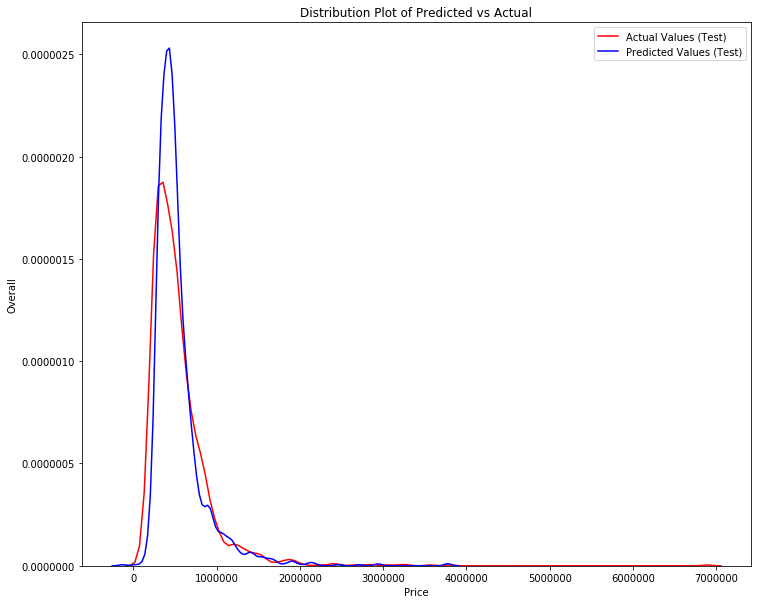

In [173]:
Title="Distribution Plot of Predicted vs Actual"
DistributionPlot(y_test,yhat, "Actual Values (Test)", "Predicted Values (Test)", Title)